### [미션2] 폴더별 자료 저장

### 참고1. 폴더생성 및 삭제

In [5]:
# 현재 작업경로에  down  폴더제작
# 이미 폴더가 제작되어 있으면 에러가 나옴, 에러 나올시 pass 하는 예외처리 해도 됨
import os
try:
    os.mkdir('down')
except:
    pass

In [6]:
# 현재 작업경로에  down  폴더제작
# glob 로 하여도 됨. 다양한 방법이 있음

from glob import glob
dirList=glob('*')
newDir='down'
if newDir not in dirList:
    os.mkdir(newDir)

In [7]:
# 폴더가 있어도  makedirs 명령어의  옵션 exist_ok=True 를 설정하면 에러없이 폴더를 생성하지 않음
os.makedirs('down',exist_ok=True)

# - https://minimin2.tistory.com/40
# - https://great-woman-hoseung.tistory.com/8

In [8]:
# 폴더가 있는경우 아래와 같이 작업도 가능함.
if os.path.exists(newDir):
    pass

In [9]:
# 있는 폴더 삭제하고 폴더 생성
# 디렉토리 삭제 : https://jvvp.tistory.com/981

os.mkdir('down\\a')  # down폴더내의  a폴더 하위 제작함.
import shutil
newDir='down'
if os.path.exists(newDir):
        print('폴더가 이미 존재 하며 삭제한뒤 재 작성합니다.')
        #os.remove(newDir)  # 폴더내의 하위자료 없을때
        shutil.rmtree(newDir) # 폴더내의 하위자료 있을때
        os.mkdir(newDir)

폴더가 이미 존재 하며 삭제한뒤 재 작성합니다.


### [미션] 폴더내의 자료 배분
- down폴더에 모든  object형 자료를 배분하고
- 폴더별 자료의 갯수를 다음과 같이 화면에 출력합니다.

- 문자의 자릿수를 맞추어서 출력(ljust) / 숫자,문자의 자릿수를 맞추어서 나머지 0으로 채워서 출력 (str.zfill)
- https://www.delftstack.com/ko/howto/python/python-pad-string-with-spaces/
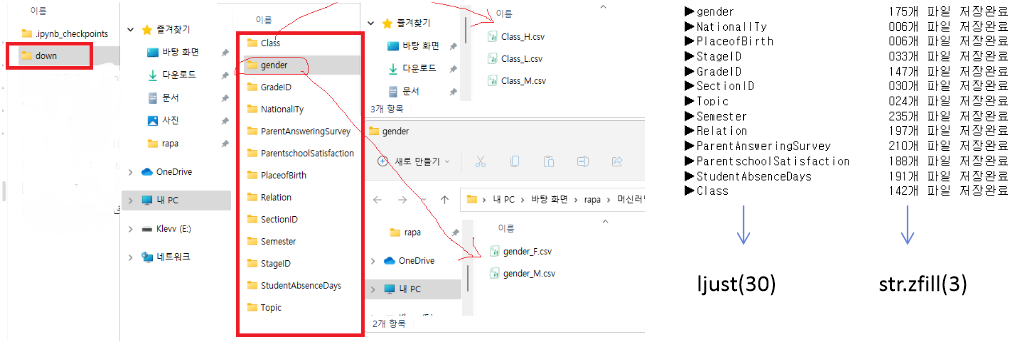



In [10]:
import pandas as pd
df=pd.read_csv('xAPI-Edu-Data.csv')

# object 타입 자료의 필드명만 추출 
objectTypeField=df.dtypes[df.dtypes=='object'].index
objectTypeField

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey',
       'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class'],
      dtype='object')

In [11]:
 ### down폴더 하단에 object형 자료 생성

In [12]:
 ### 폴더별 자료 배분, 아래와 같이 출력될수 있도록 지정


In [13]:
for j in objectTypeField:
    tmp = df[j].unique()
    tmp2 = len(tmp)
    for x in range(0,tmp2):
        os.makedirs('down\\'+j, exist_ok=True)
        a = df.loc[df[j]==tmp[x]]
        pd.DataFrame(a).to_csv('down\\'+j+'\\{}_{}.csv'.format(j, tmp[x]),index=False)
    
    print('▶'+j.ljust(30)+str(tmp2).zfill(3)+'개 파일 저장완료')

▶gender                        002개 파일 저장완료
▶NationalITy                   014개 파일 저장완료
▶PlaceofBirth                  014개 파일 저장완료
▶StageID                       003개 파일 저장완료
▶GradeID                       010개 파일 저장완료
▶SectionID                     003개 파일 저장완료
▶Topic                         012개 파일 저장완료
▶Semester                      002개 파일 저장완료
▶Relation                      002개 파일 저장완료
▶ParentAnsweringSurvey         002개 파일 저장완료
▶ParentschoolSatisfaction      002개 파일 저장완료
▶StudentAbsenceDays            002개 파일 저장완료
▶Class                         003개 파일 저장완료


### [참고] 폴더내의 img 자료의 정보  csv 로저장
- 구글검색: 파일 크기 확인
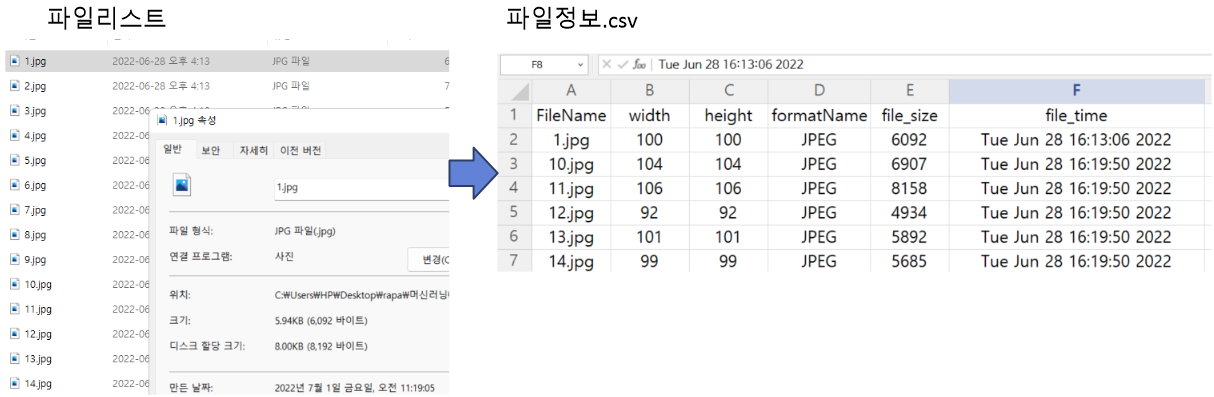

In [118]:
from PIL import Image
from glob import glob
import os
import time

imgList=glob('.\\img\\*.jpg') # 이미지 폴더에 jpg 파일이 있을때
fileListinfo=[]

for imgFile in imgList:
   
    img=Image.open(imgFile)
        
    fileListinfo.append({'FileName':img.filename.split('\\')[2],
                         'width':img.width,
                         'height':img.height,
                         'formatName':img.format,
                         'file_size':os.path.getsize(imgFile) ,
                         'file_time':time.ctime(os.path.getmtime(imgFile))}) # - 참고: 파일생성날짜 확인 https://appia.tistory.com/666
pd.DataFrame(fileListinfo).to_csv('a.csv',index=False)